<a href="https://colab.research.google.com/github/marialago/topicosInfo1/blob/main/exercicioKnn_TopInfo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Carregando os Dados

In [31]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [22]:
import pandas as pd 
dataset = pd.read_csv("data_by_year.csv")
dataset.head() 


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [23]:
dataset.describe()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000


In [30]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


In [25]:
X = dataset.iloc[:,[3,4]].values 
print(X[0:6,:]) 

[[4.18597333e-01 2.60537167e+05]
 [4.82042254e-01 1.65469746e+05]
 [5.77340541e-01 1.77942362e+05]
 [5.49894068e-01 1.91046708e+05]
 [5.73863309e-01 1.84986924e+05]
 [5.99880261e-01 1.56881657e+05]]


### Treinamento

In [26]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=6, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(X)


### Visualização do Treinamento

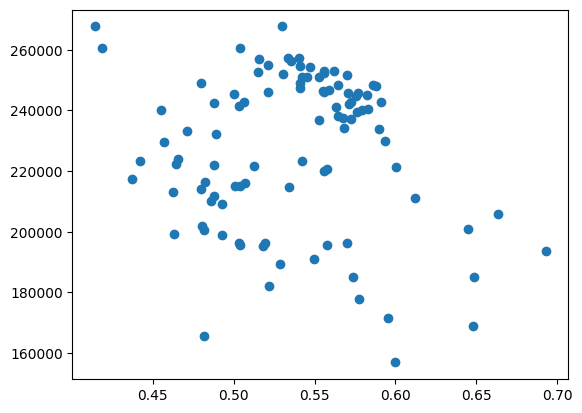

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])

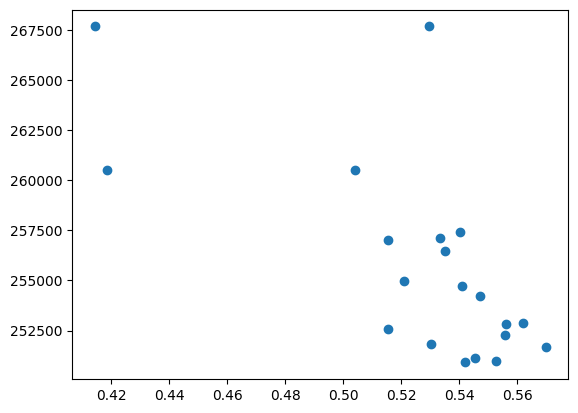

In [28]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1])

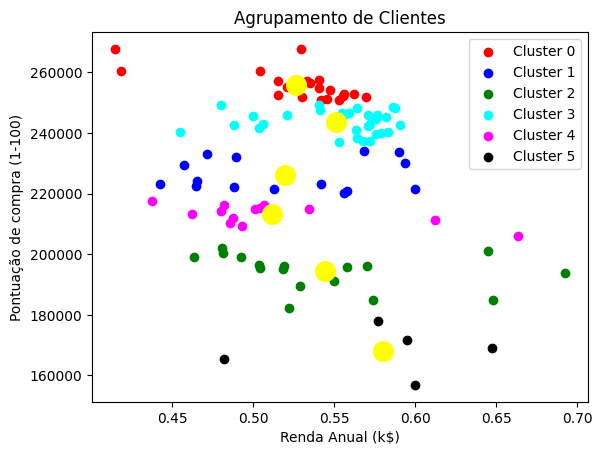

In [29]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 5,0],X[y_kmeans == 5,1], c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c='yellow' )
plt.title("Agrupamento de Clientes")
plt.xlabel("Renda Anual (k$)")
plt.ylabel("Pontuação de compra (1-100)")
plt.legend()
plt.show() 